## Yelp Sentiment Analysis of Reviews

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/23/2024**

### The question I want to answer with this Yelp sentiment analysis of reviews file is to review and discover the overall sentiment of reviews for restaurants in Jersey City, I started with using the starting Yelp fusion script my professor provided, and after that, I went ahead and made my own changes to according to the readme. file. I choose to answer this question to get a total of 60 required reviews for this project.

#### Accessing JSON data through an API - (must be kept for anyone who wishes to do the same)
##### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [26]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob
from wordcloud import WordCloud
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\denda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

I've made changes to the provided code to search for restaurants in Jersey City specifically.

In [28]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/biz/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'Fast Food'
DEFAULT_LOCATION = 'Jersey City, NJ'
SEARCH_LIMIT = 20 #3 per business limit


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [29]:
response = search(API_KEY,DEFAULT_TERM, 'Jersey City, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [30]:
response

{'businesses': [{'id': 'P_XOUFo8GV2GwiGRccrJWA',
   'alias': 'no-forks-given-jersey-city-2',
   'name': 'No Forks Given',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/JqwtKXZMRV4IB-Za996Xqg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/no-forks-given-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 72,
   'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'},
    {'alias': 'sandwiches', 'title': 'Sandwiches'},
    {'alias': 'cheesesteaks', 'title': 'Cheesesteaks'}],
   'rating': 4.7,
   'coordinates': {'latitude': 40.7229543, 'longitude': -74.05102179406057},
   'transactions': ['delivery', 'pickup'],
   'price': '$',
   'location': {'address1': '115 Brunswick St',
    'address2': '',
    'address3': None,
    'city': 'Jersey City',
    'zip_code': '07302',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['115 Bru

I was given 20 businesses for this analysis and 3 reviews from each of them for a total of 60 reviews, they are Nick's Restaurant, La Brujeria, The House of Hot Chicken, El Ranchero Taqueria, No Forks Given, Korai Kitchen, etc. now that I've gathered this business I will use the default Textblob analyzer to determine whether the reviews are positive, negative, or neutral. I will have this split into three parts, the first part will contain the Textblob sentiment analysis and the second part will contain a pie chart of these reviews. The last part will contain a wordcloud with the top 20 words used in the reviews, it will be based on the cleaned words.

In [31]:
# THIS IS THE SENTIMENT COUNTERS FOR ALL TYPES
positive_count = 0
negative_count = 0
neutral_count = 0

# THIS IS AN EMPTY LIST THAT WILL COLLECT CLEANED WORDS.
cleaned_words = []


for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        #This performs a sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        #This will remove stop words
        cleaned_review = ' '.join([word for word in blob.words if word.lower() not in stopwords.words('english')])
        cleaned_words.extend(cleaned_review.split())
        sentiment = blob.sentiment.polarity
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment < 0:
            print('    Sentiment: Negative')
            negative_count += 1
        else:
            print('    Sentiment: Neutral')
            neutral_count += 1
        print('\n================\n\n\n')
        
# This creates a counter object to count the times and appearence of each word
word_counter = Counter(cleaned_words)

#This gets the top 20 most common words
top_20_words = dict(word_counter.most_common(20))

{'businesses': [{'id': 'P_XOUFo8GV2GwiGRccrJWA', 'alias': 'no-forks-given-jersey-city-2', 'name': 'No Forks Given', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/JqwtKXZMRV4IB-Za996Xqg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/no-forks-given-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 72, 'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'cheesesteaks', 'title': 'Cheesesteaks'}], 'rating': 4.7, 'coordinates': {'latitude': 40.7229543, 'longitude': -74.05102179406057}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '115 Brunswick St', 'address2': '', 'address3': None, 'city': 'Jersey City', 'zip_code': '07302', 'country': 'US', 'state': 'NJ', 'display_address': ['115 Brunswick St', 'Jersey City, NJ 07302']}, 'phone': '+12013600364', 'display

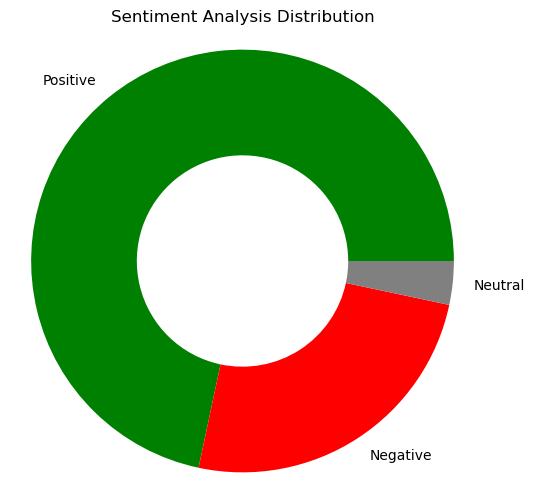

In [32]:
# I'm defining the info/data here
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]

# This creates the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'gray'])
ax.set_title('Sentiment Analysis Distribution')

# This pretty much is used to make sure that the pie chart is a circle
ax.axis('equal')
plt.show()

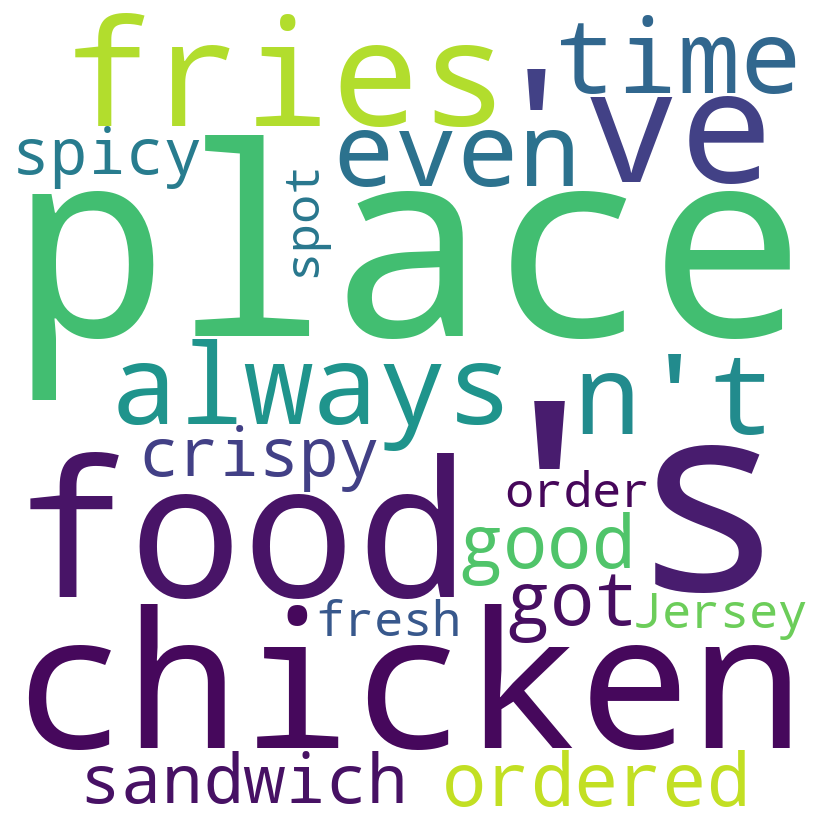

In [34]:
# I'M CREATING A WORDCLOUD OBJECT THAT WILL HOLD ONLY THE TOP 20 WORDS.
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(top_20_words)

#THIS IS THE WORDCLOUD ITSELF
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


It appears that the majority of the sentiments were positive, there are many negative ones and a few neutral ones too. Overall it appears that the restaurants in Jersey City are seen in more of a positive light, there are not as many neutral reviews and there do appear to be quite a few negative reviews too. The Textblob wordcloud seems to be somewhat accurate in determining words as it has quite a few abbreviated versions of words in it. However, it does appear there wasn't much of a misunderstanding in determining words.

Now I will use NaiveBayesAnalyzer to determine whether the reviews are positive, negative, or neutral. It will be structured in the same was as I structured the TextBlob Analyzer, being split into 3 parts, the first part will contain the analysis from NaiveBayesAnalyzer the second part contain a pie chart, the last part will have a wordcloud with all of the words.

In [35]:
# This is a sentiment counter, used for pie chart
positive_count = 0
negative_count = 0
neutral_count = 0

# THIS IS AN EMPTY LIST THAT WILL COLLECT CLEANED WORDS.
cleaned_words = []

for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # This performs a sentiment analysis on the review using NaiveBayersAnalyzer
        blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment
        if sentiment.classification == 'pos':
            print('    Sentiment: Positive')
            positive_count += 1
        elif sentiment.classification == 'neg':
            print('    Sentiment: Negative')
            negative_count += 1
        else:
            print('    Sentiment: Neutral')
            neutral_count += 1
        print('\n================\n\n\n')
        
        #THIS REMOVES STOP WORDS
        cleaned_review = ' '.join([word for word in blob.words if word.lower() not in stopwords.words('english')])
        cleaned_words.extend(cleaned_review.split())

{'businesses': [{'id': 'P_XOUFo8GV2GwiGRccrJWA', 'alias': 'no-forks-given-jersey-city-2', 'name': 'No Forks Given', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/JqwtKXZMRV4IB-Za996Xqg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/no-forks-given-jersey-city-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 72, 'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'cheesesteaks', 'title': 'Cheesesteaks'}], 'rating': 4.7, 'coordinates': {'latitude': 40.7229543, 'longitude': -74.05102179406057}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '115 Brunswick St', 'address2': '', 'address3': None, 'city': 'Jersey City', 'zip_code': '07302', 'country': 'US', 'state': 'NJ', 'display_address': ['115 Brunswick St', 'Jersey City, NJ 07302']}, 'phone': '+12013600364', 'display

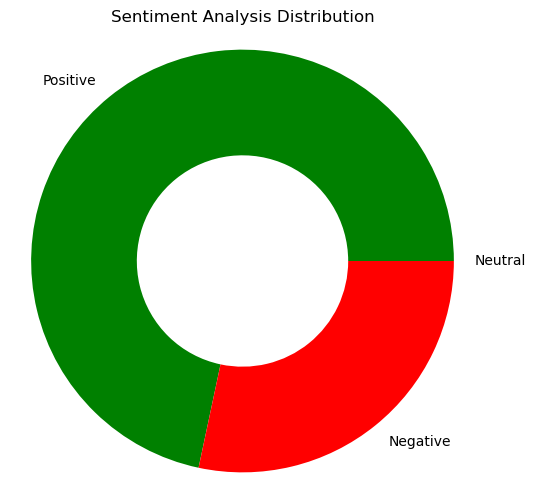

In [36]:
# I'm defining the info/data here
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]

# This creates the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'gray'])
ax.set_title('Sentiment Analysis Distribution')

# This pretty much is used to make sure that the pie chart is a circle
ax.axis('equal')
plt.show()

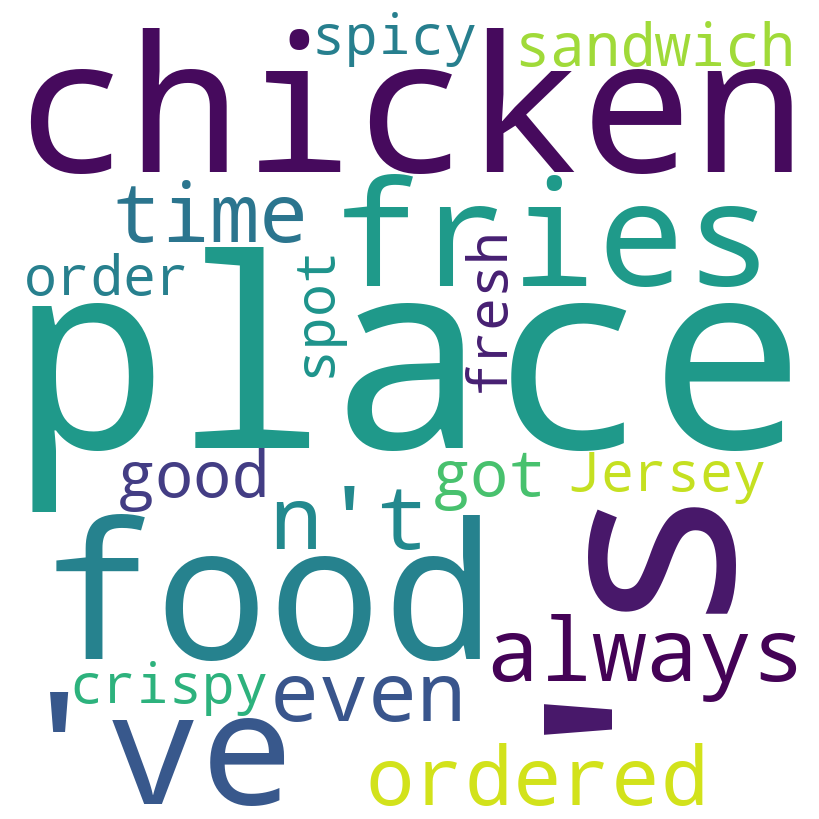

In [37]:
# THIS IS A COUNTER OBJECT, USED TO COUNT EACH WORDS APPEARENCE.
word_counter = Counter(cleaned_words)

#THIS GETS THE TOP 20 MOST USED WORDS
top_20_words = dict(word_counter.most_common(20))

# THIS IS THE WORDCLOUD OBJECT FOR THE 20 WORDS
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(top_20_words)

#THIS IS THE WORDCLOUD.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


It appears that the NaiveBayesAnalyzer determined there are no neutral reviews and more negative reviews compared to the TextBlob analyzer, It appears to be around 40% negative reviews. But upon closer inspection, it can be seen that the NaiveBayesAnalyzer is wrong. For example, the NaiveBayerAnalyzer determined that the review comment "everything was fireeee!" was negative while the TextBlob analyzer determined it was positive, which would fit in with how people would interpret it. It can be seen that the default TextBlob analyzer is more on the accurate side for analyzing reviews, the NaiveBayesAnalyzer doesn't appear to be as accurate. It can also be seen that the Textblob wordcloud was able to pick up on more words in comparison to the NaiveBayerAnalyzer cloudword, since it mistakenly has more words that are appreciative versions of themselves.

In conclusion, it appears that a majority of people have positive feelings regarding restaurants in Jersey City, NJ. Though it is from 20 different ones which were randomly gathered from the Yelp search. It can be said that the TextBlob Analyzer tends to be more accurate in analyzing reviews in comparison to the NavieBayesAnalzyer as it did display more accurate results on a closer inspection. It appears that the most common words used in each review were place, chicken, food, crispy, even, ordered, always, jersey, time, etc. It does appear that the words gathered in the TextBlob wordcloud were more accurate in gathering words in comparison to the words gathered from the NaiveBayerAnalyzer wordcloud. I'm guessing this is because the TextBlob is made to understand every word in correlation with other words and thus assumed that the cleaned words themselves were words, it appears that the same happened for the Textblob wordcloud too, Though since it seems to inspect words more closely, it's more accurate in determining whether real words were used in each review compared to the NaiveBayerAnalyzer wordcloud. It does appear that there are some negative reviews for the restaurants but they aren't as many as the positive ones. Overall it could be said that some restaurants in Jersey City can at times provide negative experiences for their customers.